In [1]:
! pip install -q deepface

     |████████████████████████████████| 61kB 1.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
! unzip my_img.zip

Archive:  my_img.zip
   creating: my_img/
   creating: my_img/database/
   creating: my_img/database/Linus/
  inflating: my_img/database/Linus/linus-torvalds-ted.jpg  
  inflating: my_img/database/Linus/Linus.jpg  
  inflating: my_img/database/Linus/Linus_Torvalds_(cropped).jpg  
  inflating: my_img/database/Linus/Torvalds.jpg  
   creating: my_img/database/Motaz/
  inflating: my_img/database/Motaz/Motaz 1.jpg  
  inflating: my_img/database/Motaz/Motaz 2.jpg  
  inflating: my_img/database/Motaz/Motaz 6.jpg  
   creating: my_img/database/Salah/
  inflating: my_img/database/Salah/Atalayar_Mohamed Salah, jugador del Liverpool (4).jpg  
  inflating: my_img/database/Salah/Mohamed Salah.jpg  
   creating: my_img/test_img/
  inflating: my_img/test_img/Linus.jpg  
  inflating: my_img/test_img/Salah.jpg  


In [3]:
from deepface import DeepFace
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [4]:
df = DeepFace.find(img_path = '/content/my_img/test_img/Linus.jpg', db_path = '/content/my_img/database')
df

Using VGG-Face model backend and cosine distance.
vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /root/.deepface/weights/vgg_face_weights.h5
580MB [00:04, 121MB/s]
Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

Representations stored in  /content/my_img/database / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.


Analyzing: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

find function lasts  26.493144989013672  seconds


,identity,distance
0,/content/my_img/database/Linus/Linus.jpg,5.960464e-08
1,/content/my_img/database/Linus/linus-torvalds-...,1.729455e-01
2,/content/my_img/database/Linus/Torvalds.jpg,2.311317e-01
3,/content/my_img/database/Motaz/Motaz 1.jpg,3.981031e-01


In [5]:
im_path = '/content/my_img/database/Linus/'
test_imgs = [im_path + im for im in os.listdir(im_path)]
test_imgs

['/content/my_img/database/Linus/Linus_Torvalds_(cropped).jpg',
 '/content/my_img/database/Linus/Torvalds.jpg',
 '/content/my_img/database/Linus/Linus.jpg',
 '/content/my_img/database/Linus/linus-torvalds-ted.jpg']

In [6]:
img = cv2.imread(test_imgs[0])
DeepFace.analyze(img , actions = ['age', 'gender', 'race', 'emotion'])

Actions to do:  ['age', 'gender', 'race', 'emotion']
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: /root/.deepface/weights/facial_expression_model_weights.zip
5.54MB [00:00, 12.2MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1YCox_4kJ-BYeXq27uUbasu--yz28zUMV
To: /root/.deepface/weights/age_model_weights.h5
539MB [00:12, 42.8MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: /root/.deepface/weights/gender_model_weights.h5
537MB [00:11, 46.6MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj
To: /root/.deepface/weights/race_model_single_batch.zip
511MB [00:09, 52.8MB/s]
Action: emotion:  75%|███████▌  | 3/4 [00:02<00:00,  1.31it/s]


Analyzing:   0%|          | 0/1 [00:02<?, ?it/s]


{'age': 27.00120558201468,
 'dominant_emotion': 'happy',
 'dominant_race': 'white',
 'emotion': {'angry': 3.0842013005536424e-07,
  'disgust': 5.156045711323494e-12,
  'fear': 7.463382579383838e-08,
  'happy': 99.56248996034205,
  'neutral': 0.4373824018914939,
  'sad': 0.00010327859787909455,
  'surprise': 2.4521041593298817e-05},
 'gender': 'Man',
 'race': {'asian': 1.2417286550885375e-08,
  'black': 3.9148571207241663e-10,
  'indian': 5.4114339886354165e-08,
  'latino hispanic': 0.0017792890201099268,
  'middle eastern': 0.0027219241412530745,
  'white': 99.99549388939215}}

In [ ]:
results = []
for im in test_imgs:
  img = cv2.imread(im)
  results.append(DeepFace.analyze(img , actions = ['age', 'gender', 'race', 'emotion']))

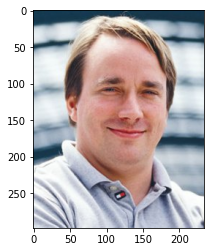

Age:  27.00120558201468
Gender:  Man
Emotion:  happy
Race:  white


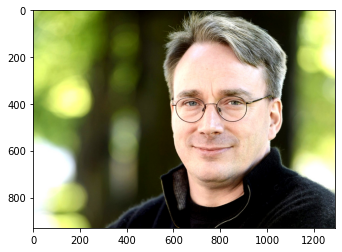

Age:  35.94616568541977
Gender:  Man
Emotion:  neutral
Race:  white


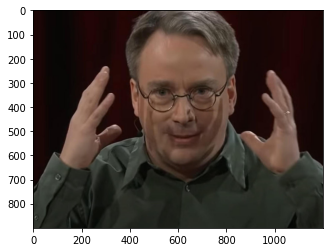

Age:  42.77809752311043
Gender:  Man
Emotion:  angry
Race:  white


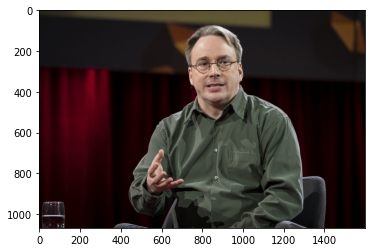

Age:  45.28809536914913
Gender:  Man
Emotion:  angry
Race:  white


In [8]:
for img, r in zip(test_imgs, results):
  img = cv2.imread(img)
  plt.imshow(img[:,:,::-1])
  plt.show()
  print("Age: ", r["age"])
  print("Gender: ", r["gender"])
  print("Emotion: ", r["dominant_emotion"])
  print("Race: ", r["dominant_race"])

In [4]:
im_path = '/content/my_img/database/Motaz/'
test_imgs = [im_path + im for im in os.listdir(im_path)]
test_imgs

['/content/my_img/database/Motaz/Motaz 6.jpg',
 '/content/my_img/database/Motaz/Motaz 2.jpg',
 '/content/my_img/database/Motaz/Motaz 1.jpg']

In [ ]:
results = []
for im in test_imgs:
  img = cv2.imread(im)
  results.append(DeepFace.analyze(img , actions = ['age', 'gender', 'race', 'emotion']))

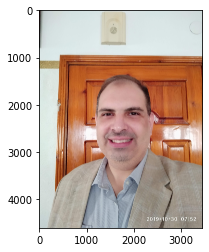

Age:  24.72123504304155
Gender:  Man
Emotion:  happy
Race:  white


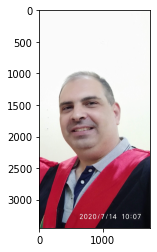

Age:  25.72785321875271
Gender:  Man
Emotion:  happy
Race:  white


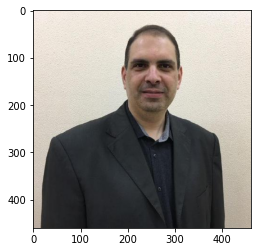

Age:  27.47455178506631
Gender:  Man
Emotion:  neutral
Race:  white


In [6]:
for img, r in zip(test_imgs, results):
  img = cv2.imread(img)
  plt.imshow(img[:,:,::-1])
  plt.show()
  print("Age: ", r["age"])
  print("Gender: ", r["gender"])
  print("Emotion: ", r["dominant_emotion"])
  print("Race: ", r["dominant_race"])

In [7]:
im_path = '/content/my_img/database/Salah/'
test_imgs = [im_path + im for im in os.listdir(im_path)]
test_imgs

['/content/my_img/database/Salah/Atalayar_Mohamed Salah, jugador del Liverpool (4).jpg',
 '/content/my_img/database/Salah/Mohamed Salah.jpg']

In [8]:
results = []
for im in test_imgs:
  img = cv2.imread(im)
  results.append(DeepFace.analyze(img , actions = ['age', 'gender', 'race', 'emotion']))

Actions to do:  ['age', 'gender', 'race', 'emotion']





Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]



Finding actions:   0%|          | 0/4 [00:00<?, ?it/s]



Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    





Action: age:  25%|██▌       | 1/4 [00:00<00:02,  1.07it/s]



Action: gender:  25%|██▌       | 1/4 [00:00<00:02,  1.07it/s]





Action: gender:  50%|█████     | 2/4 [00:01<00:01,  1.14it/s]



Action: race:  50%|█████     | 2/4 [00:01<00:01,  1.14it/s]  





Action: race:  75%|███████▌  | 3/4 [00:02<00:00,  1.20it/s]



Action: emotion:  75%|███████▌  | 3/4 [00:02<00:00,  1.20it/s]





Analyzing:   0%|          | 0/1 [00:02<?, ?it/s]

Actions to do:  ['age', 'gender', 'race', 'emotion']






Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]



Finding actions:   0%|          | 0/4 [00:00<?, ?it/s]



Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    





Action: age:  25%|██▌       | 1/4 [00:01<00:03,  1.04s/it]



Action: gender:  25%|██▌       | 1/4 [00:01<00:03,  1.04s/it]





Action: gender:  50%|█████     | 2/4 [00:01<00:01,  1.04it/s]



Action: race:  50%|█████     | 2/4 [00:01<00:01,  1.04it/s]  





Action: race:  75%|███████▌  | 3/4 [00:02<00:00,  1.12it/s]



Action: emotion:  75%|███████▌  | 3/4 [00:02<00:00,  1.12it/s]





Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


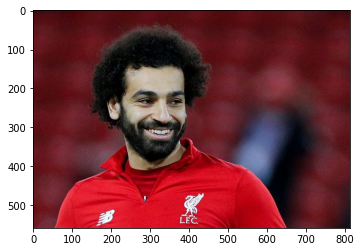

Age:  29.71487865778691
Gender:  Man
Emotion:  happy
Race:  middle eastern


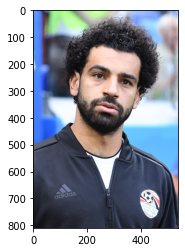

Age:  25.429729384062078
Gender:  Man
Emotion:  neutral
Race:  middle eastern


In [9]:
for img, r in zip(test_imgs, results):
  img = cv2.imread(img)
  plt.imshow(img[:,:,::-1])
  plt.show()
  print("Age: ", r["age"])
  print("Gender: ", r["gender"])
  print("Emotion: ", r["dominant_emotion"])
  print("Race: ", r["dominant_race"])